In [389]:
# !pip install --upgrade Pillow

In [390]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import numpy as np

### USING LINE AND QUADRATIC BEZEL


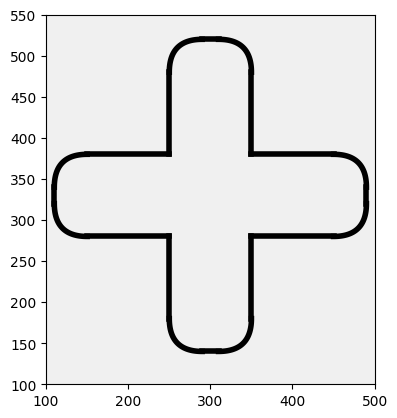

In [397]:
# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(100, 500)
ax.set_ylim(100, 550)
ax.set_facecolor((240 / 255, 240 / 255, 240 / 255))


# Quadratic Bezier curve function
def quadratic_bezier(t, p0, p1, p2):
    x = (1 - t) ** 2 * p0[0] + 2 * (1 - t) * t * p1[0] + t**2 * p2[0]
    y = (1 - t) ** 2 * p0[1] + 2 * (1 - t) * t * p1[1] + t**2 * p2[1]
    return x, y


# Draw the cross using lines and quadratic Bezier curves

# Top part
ax.plot([250, 250], [280, 180], "k-", linewidth=4)
ax.plot([350, 350], [180, 280], "k-", linewidth=4)
ax.plot([290, 310], [140, 140], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (250, 180), (250, 140), (290, 140))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (310, 140), (350, 140), (350, 180))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)
# Right part
ax.plot([350, 450], [280, 280], "k-", linewidth=4)
ax.plot([490, 490], [320, 340], "k-", linewidth=4)
ax.plot([350, 450], [380, 380], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (450, 280), (490, 280), (490, 320))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (490, 340), (490, 380), (450, 380))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)

# Bottom part
ax.plot([250, 250], [380, 480], "k-", linewidth=4)
ax.plot([290, 310], [520, 520], "k-", linewidth=4)
ax.plot([350, 350], [380, 480], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (250, 480), (250, 520), (290, 520))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (310, 520), (350, 520), (350, 480))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)

# Left part
ax.plot([250, 150], [280, 280], "k-", linewidth=4)
ax.plot([110, 110], [320, 340], "k-", linewidth=4)
ax.plot([250, 150], [380, 380], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (150, 280), (110, 280), (110, 320))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)
points = np.array(
    [
        quadratic_bezier(t, (110, 340), (110, 380), (150, 380))
        for t in np.linspace(0, 1, 101)
    ]
)
ax.plot(points[:, 0], points[:, 1], "k-", linewidth=4)


plt.show()

### USING GENERAL PATH


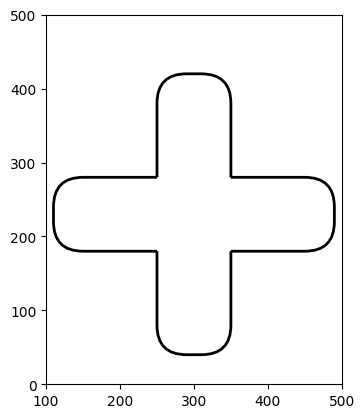

In [399]:
verticesA = [
    (250, 280),  # Starting point
    (250, 380),  # Straight line
    (250, 420),  # Curve 1
    (290, 420),  # Curve 1
    (310, 420),  # Straight line
    (350, 420),  # Curve 2
    (350, 380),  # Curve 2
    (350, 280),  # Ending point
]

verticesB = [
    (350, 280),  # Starting point
    (450, 280),  # Straight line
    (490, 280),  # Curve 1
    (490, 240),  # Curve 1
    (490, 220),  # Straight line
    (490, 180),  # Curve 2
    (450, 180),  # Curve 2
    (350, 180),  # Ending point
]

verticesC = [
    (350, 180),  # Starting point
    (350, 80),
    (350, 40),
    (310, 40),
    (290, 40),
    (250, 40),
    (250, 80),
    (250, 180),  # Ending point
]

verticesD = [
    (250, 180),  # Starting point
    (150, 180),
    (110, 180),
    (110, 220),
    (110, 240),
    (110, 280),
    (150, 280),
    (250, 280),  # Ending point
]


codes = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.CURVE3,
    path.Path.CURVE3,
    path.Path.LINETO,
    path.Path.CURVE3,
    path.Path.CURVE3,
    path.Path.LINETO,
]

pathA = path.Path(verticesA, codes)
pathB = path.Path(verticesB, codes)
pathC = path.Path(verticesC, codes)
pathD = path.Path(verticesD, codes)

patchA = patches.PathPatch(pathA, facecolor="none", lw=2)
patchB = patches.PathPatch(pathB, facecolor="none", lw=2)
patchC = patches.PathPatch(pathC, facecolor="none", lw=2)
patchD = patches.PathPatch(pathD, facecolor="none", lw=2)

fig, ax = plt.subplots()

ax.add_patch(patchA)
ax.add_patch(patchB)
ax.add_patch(patchC)
ax.add_patch(patchD)

ax.set_xlim(100, 500)
ax.set_ylim(0, 500)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

### Christmas Treee


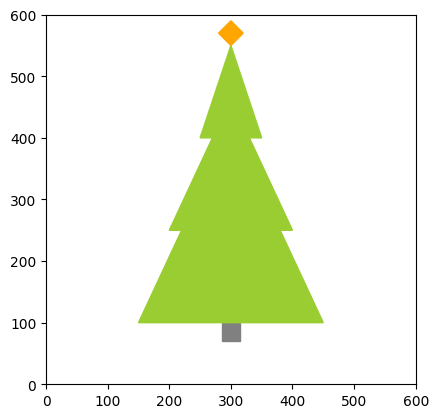

In [393]:
verticesBase = [(285, 100), (315, 100), (315, 70), (285, 70), (285, 100)]

verticesTree = [
    (300, 100),
    (150, 100),
    (220, 250),
    (200, 250),
    (270, 400),
    (250, 400),
    (300, 550),
    (350, 400),
    (330, 400),
    (400, 250),
    (380, 250),
    (450, 100),
    (300, 100),
]

verticesStar = [(300, 550), (280, 570), (300, 590), (320, 570), (300, 550)]

codesTrees = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.CLOSEPOLY,
]

codesBase = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.CLOSEPOLY,
]

codesTree = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
]

codesStar = [
    path.Path.MOVETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.LINETO,
    path.Path.CLOSEPOLY,
]

pathBase = path.Path(verticesBase, codesBase)
pathTree1 = path.Path(verticesTree, codesTrees)
pathStar = path.Path(verticesStar, codesStar)

patchBase = patches.PathPatch(pathBase, edgecolor="Gray", facecolor="Gray", lw=1)

patchTree1 = patches.PathPatch(
    pathTree1, edgecolor="YellowGreen", facecolor="YellowGreen", lw=1
)

patchStar = patches.PathPatch(pathStar, edgecolor="Orange", facecolor="Orange", lw=1)


fig, ax = plt.subplots()

ax.add_patch(patchBase)
ax.add_patch(patchTree1)
ax.add_patch(patchStar)

ax.set_xlim(0, 600)
ax.set_ylim(0, 600)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()